In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from datetime import datetime
from esda.moran import Moran

from libpysal.weights.contiguity import Queen
import os
import splot
from splot.esda import moran_scatterplot
from esda.moran import Moran_Local
from splot.esda import plot_moran
from splot.esda import plot_local_autocorrelation
from splot.esda import moran_scatterplot

In [8]:
df = pd.read_csv(r"C:\Users\PcLaptop\Documents\GitHub\Climate-and-conflict\old steps\reg_TA_PA_DL_new.csv")
states_gdf = gpd.read_file(r"C:\Users\PcLaptop\Documents\GitHub\Climate-and-conflict\Datasets\som_adm_ocha_itos_20230308_shp\som_admbnda_adm1_ocha_20230308.shp")
dist = pd.read_csv(r"C:\Users\PcLaptop\Dropbox (Politecnico Di Torino Studenti)\Untitled Folder\distance_df.csv")

In [9]:
df['time'] = pd.to_datetime(df['time'])
conf_y=df.groupby([pd.Grouper(key='time', freq='Y'),'admin1'])['conflicts'].sum()
conf_y=conf_y.reset_index([1])
conf_y['admin1'] = conf_y['admin1'].str.replace('_', ' ')

Year: 1997
p-value: 0.03
Moran I: 0.31790123456790126


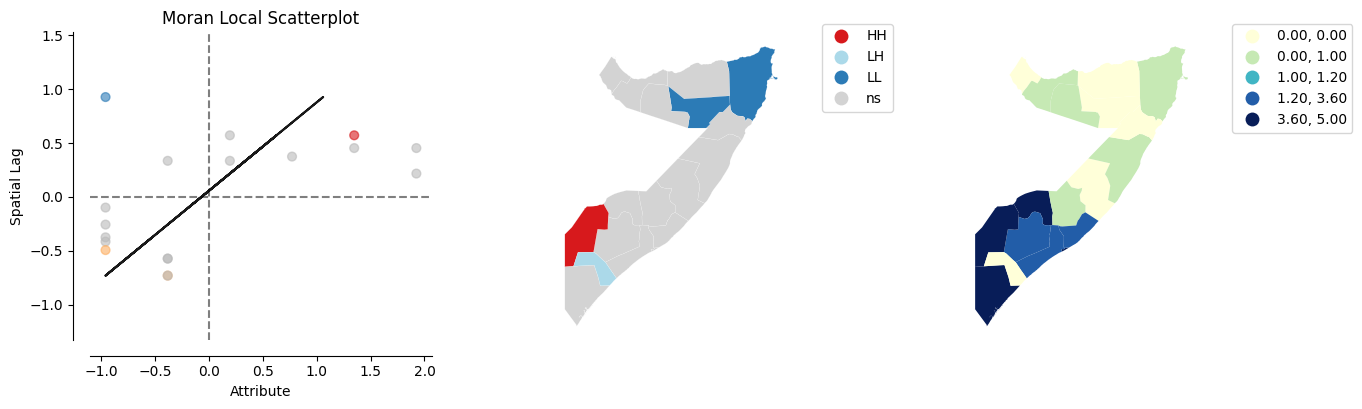

Year: 1998
p-value: 0.488
Moran I: -0.09595648604269294


c:\Users\PcLaptop\AppData\Local\Programs\Python\Python311\Lib\site-packages\mapclassify\classifiers.py:255: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 3.
  warnings.warn(


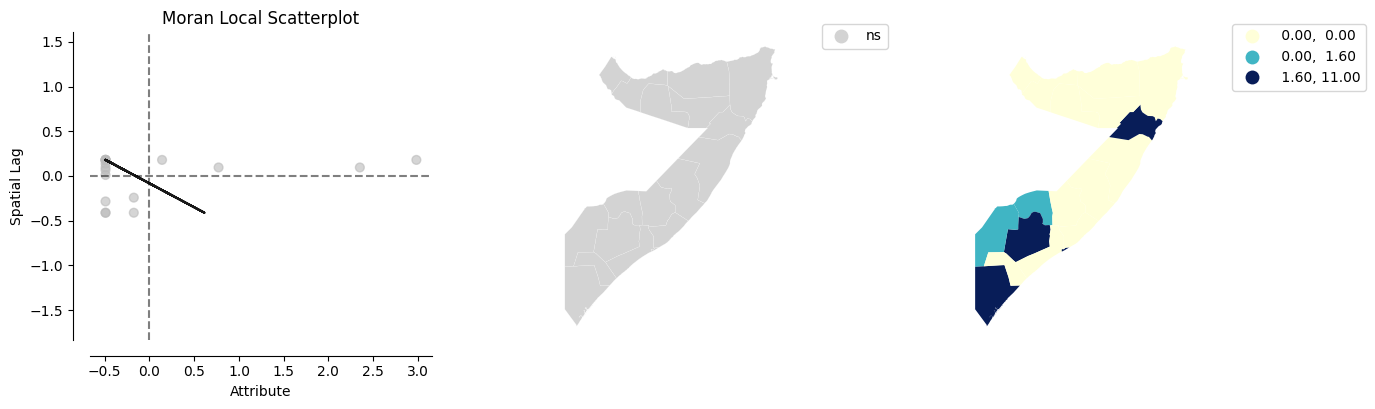

Year: 1999
p-value: 0.081
Moran I: 0.1788073038073038


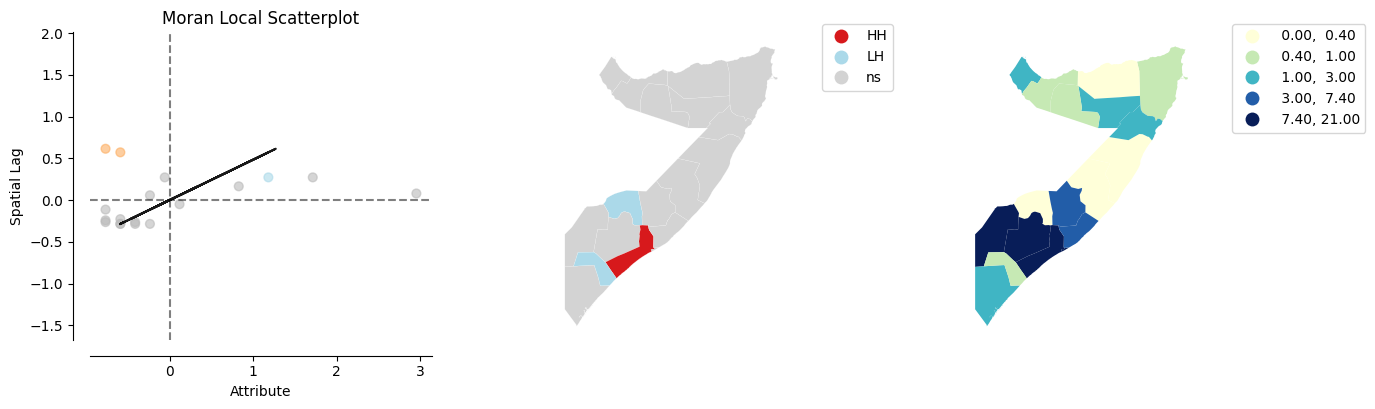

Year: 2000
p-value: 0.033
Moran I: 0.1686810856658185


c:\Users\PcLaptop\AppData\Local\Programs\Python\Python311\Lib\site-packages\esda\moran.py:1057: RuntimeWarning: invalid value encountered in divide
  self.z_sim = (self.Is - self.EI_sim) / self.seI_sim


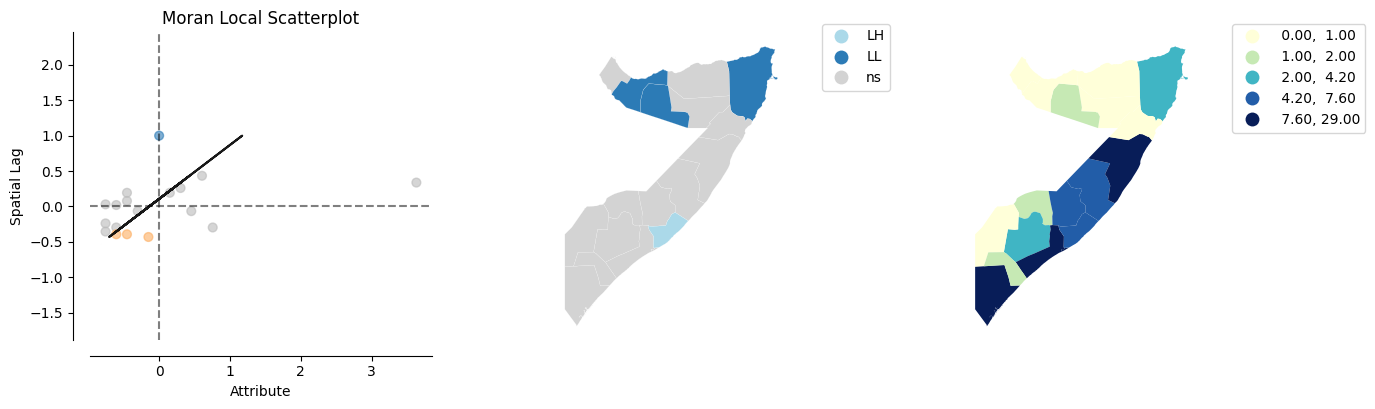

Year: 2001
p-value: 0.176
Moran I: 0.017203513909224005


c:\Users\PcLaptop\AppData\Local\Programs\Python\Python311\Lib\site-packages\mapclassify\classifiers.py:255: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 4.
  warnings.warn(


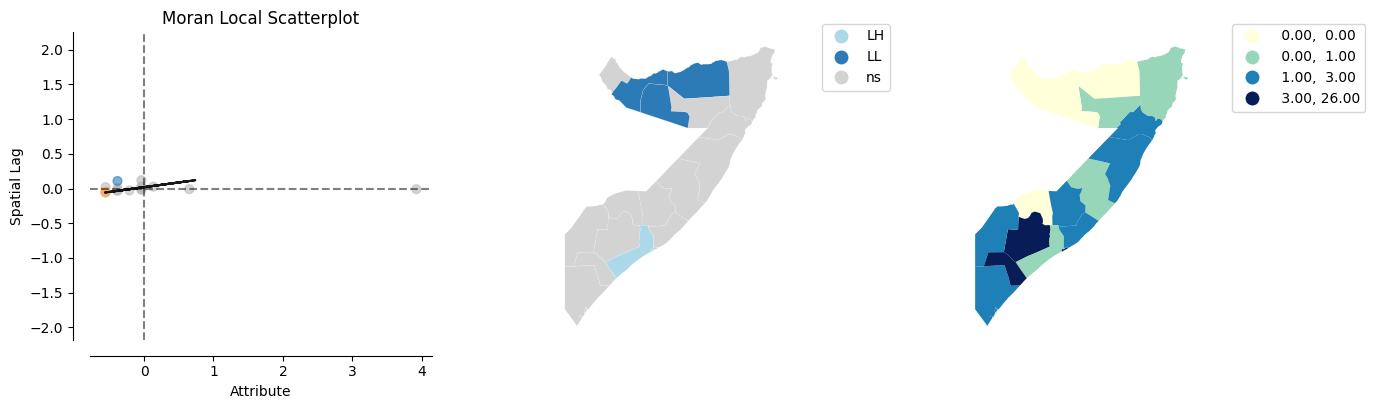

Year: 2002
p-value: 0.224
Moran I: -0.008021694068205715


c:\Users\PcLaptop\AppData\Local\Programs\Python\Python311\Lib\site-packages\mapclassify\classifiers.py:255: UserWarning: Not enough unique values in array to form 5 classes. Setting k to 4.
  warnings.warn(


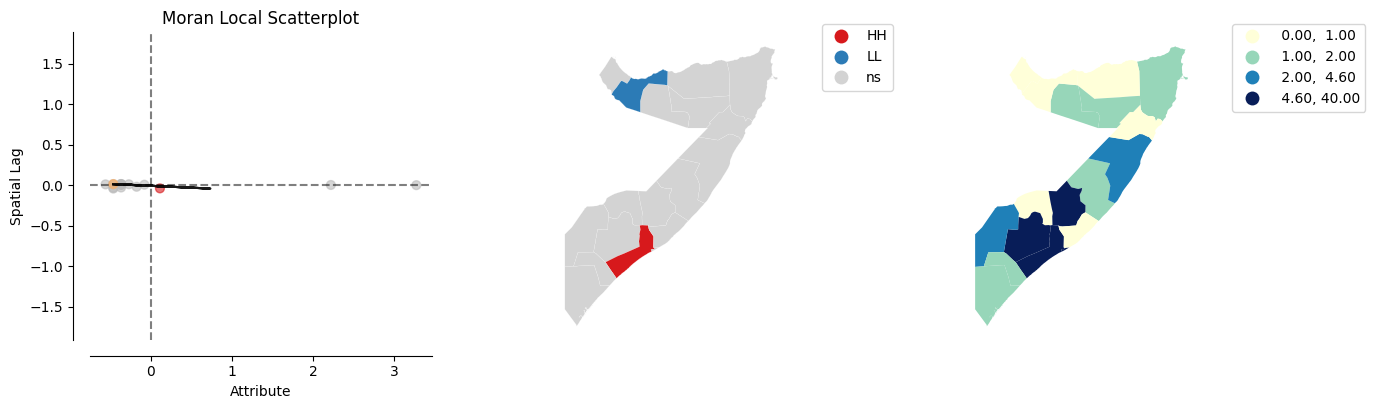

Year: 2003
p-value: 0.03
Moran I: -0.0049070392237204824


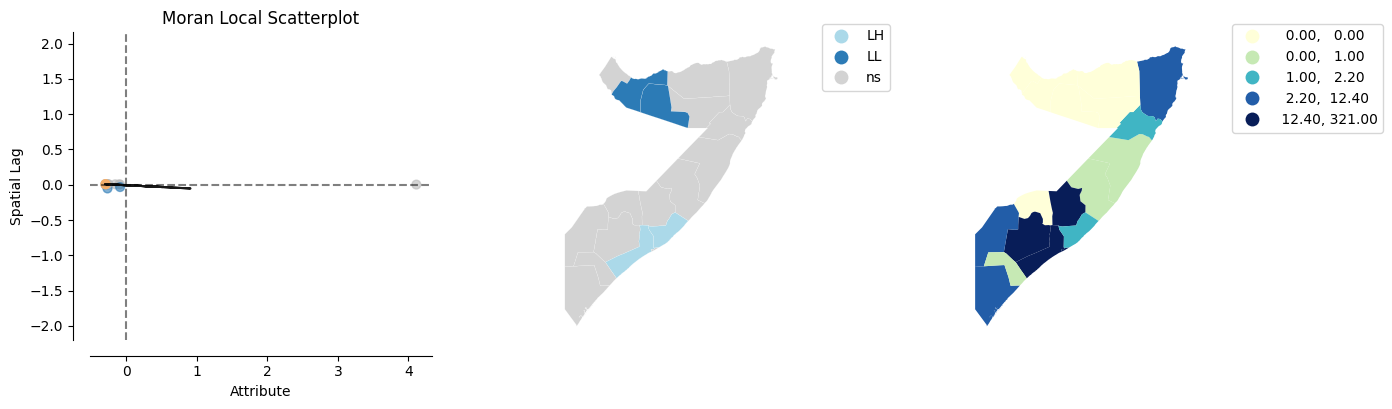

Year: 2004
p-value: 0.226
Moran I: -0.008938471616418227


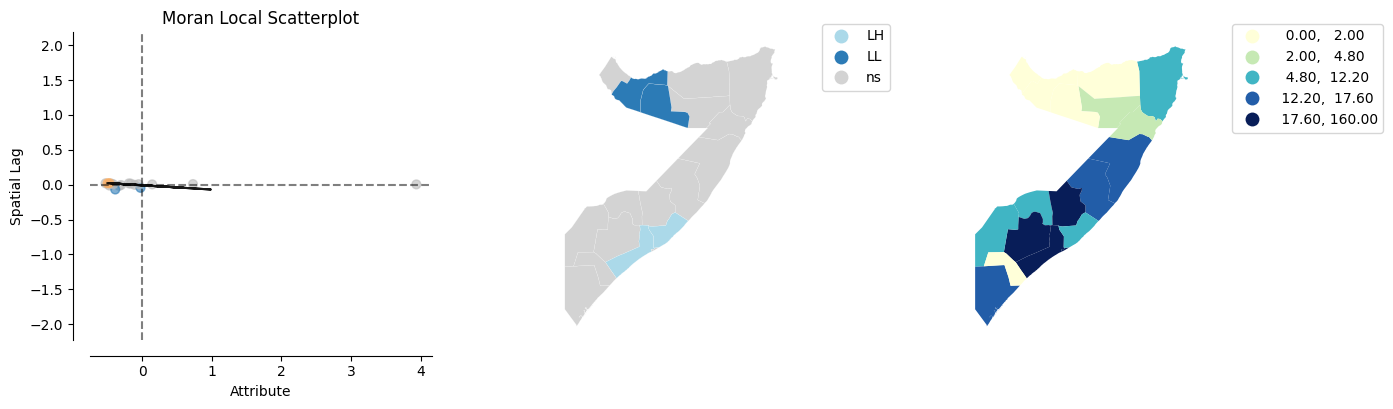

Year: 2005
p-value: 0.118
Moran I: 0.11856944432915809


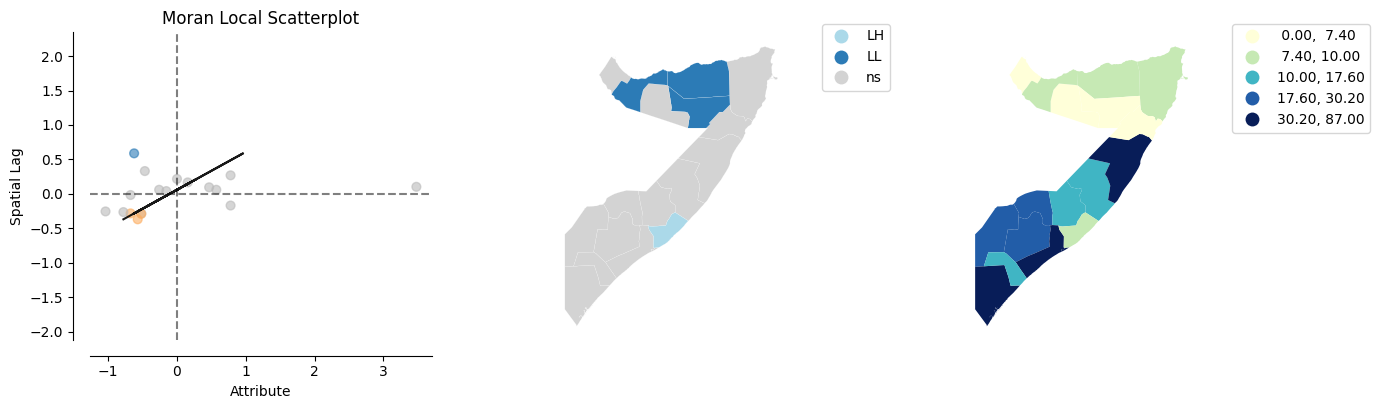

Year: 2006
p-value: 0.271
Moran I: 0.015518509913258982


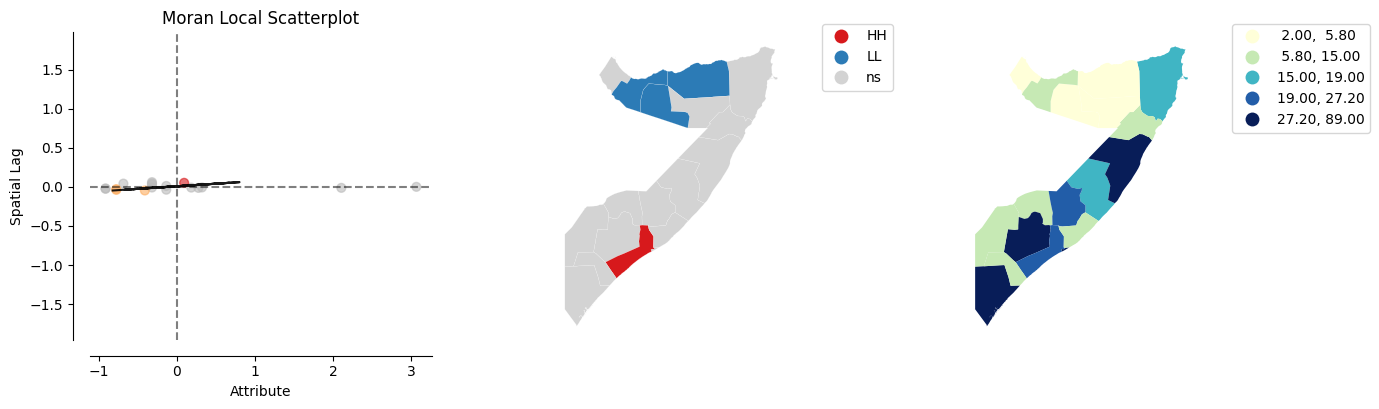

Year: 2007
p-value: 0.012
Moran I: 0.0782765985576873


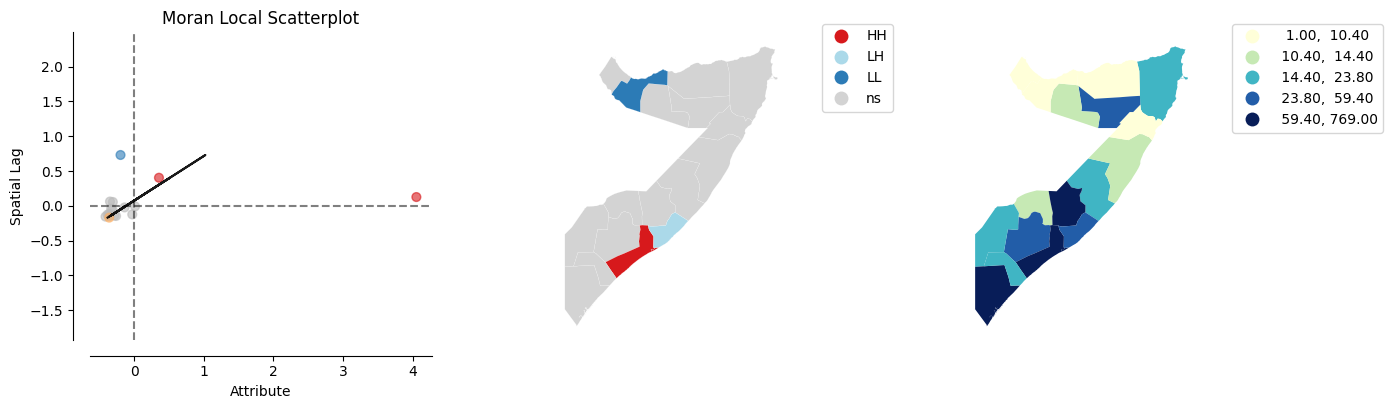

Year: 2008
p-value: 0.026
Moran I: 0.14516663387755238


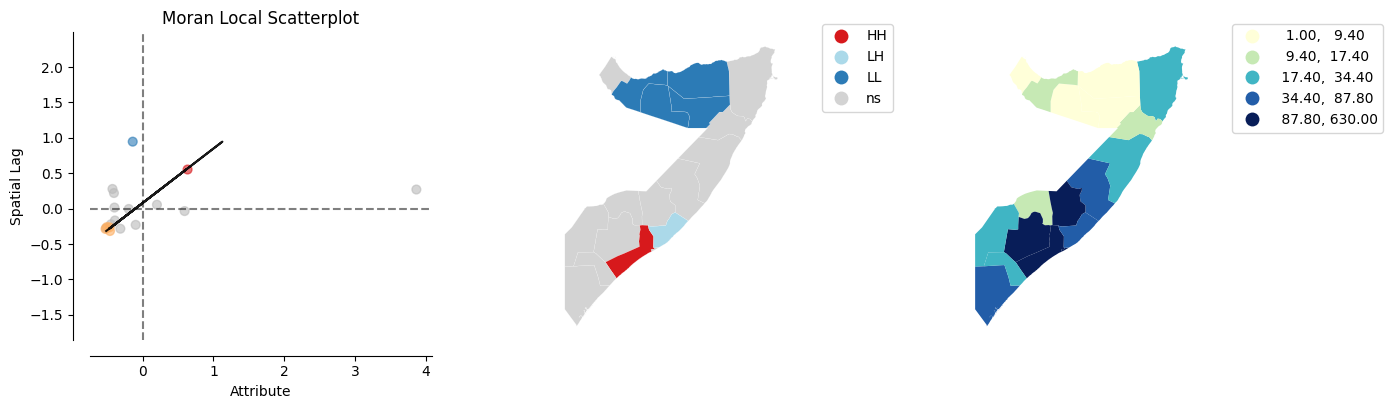

Year: 2009
p-value: 0.003
Moran I: 0.11720673597191437


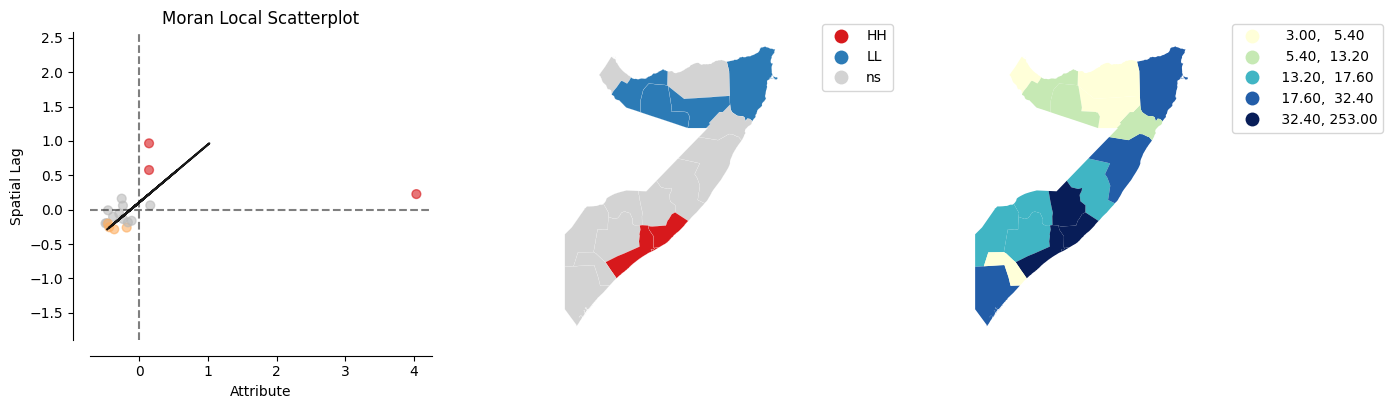

Year: 2010
p-value: 0.238
Moran I: -0.02081682759356398


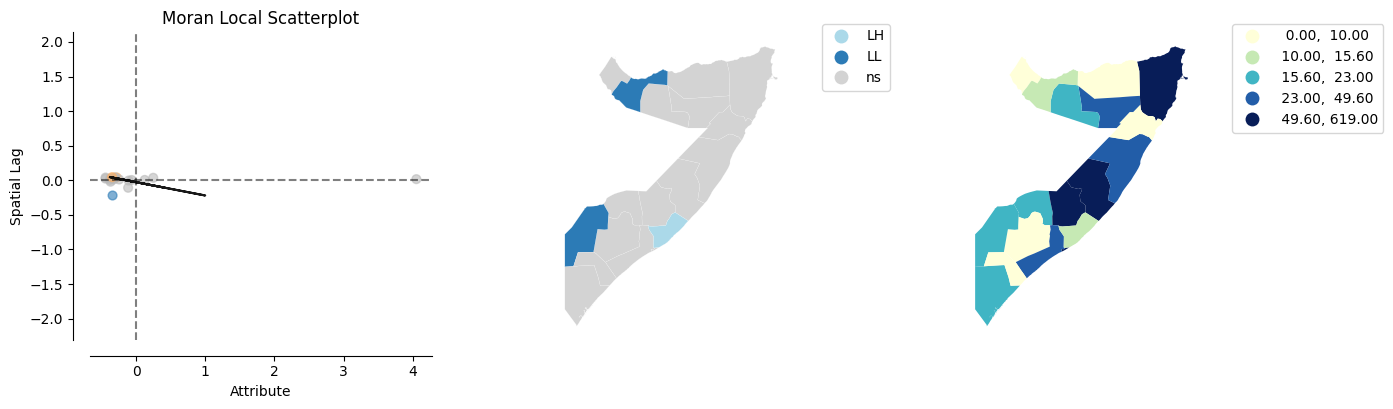

Year: 2011
p-value: 0.389
Moran I: -0.04876636515244504


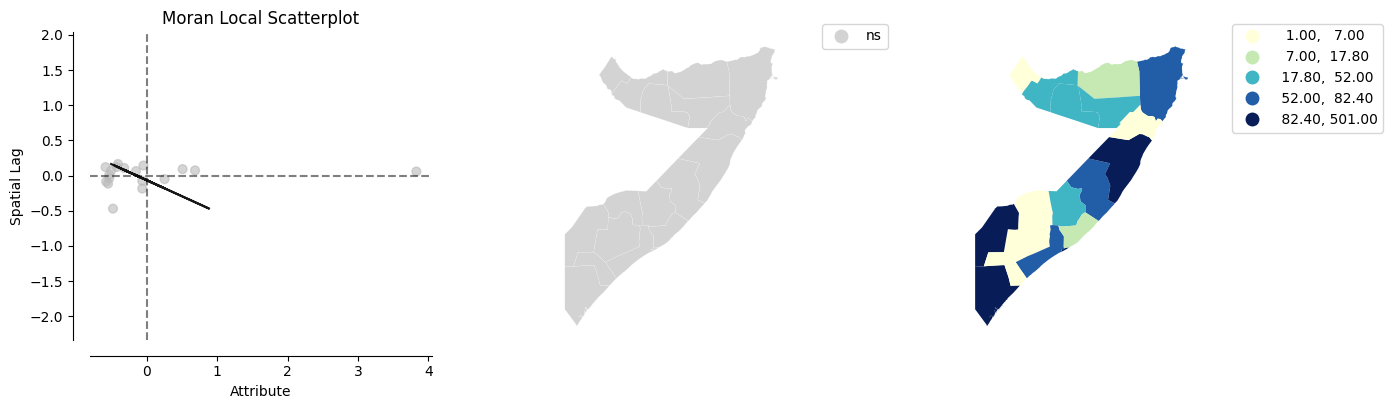

Year: 2012
p-value: 0.071
Moran I: 0.12345105576242432


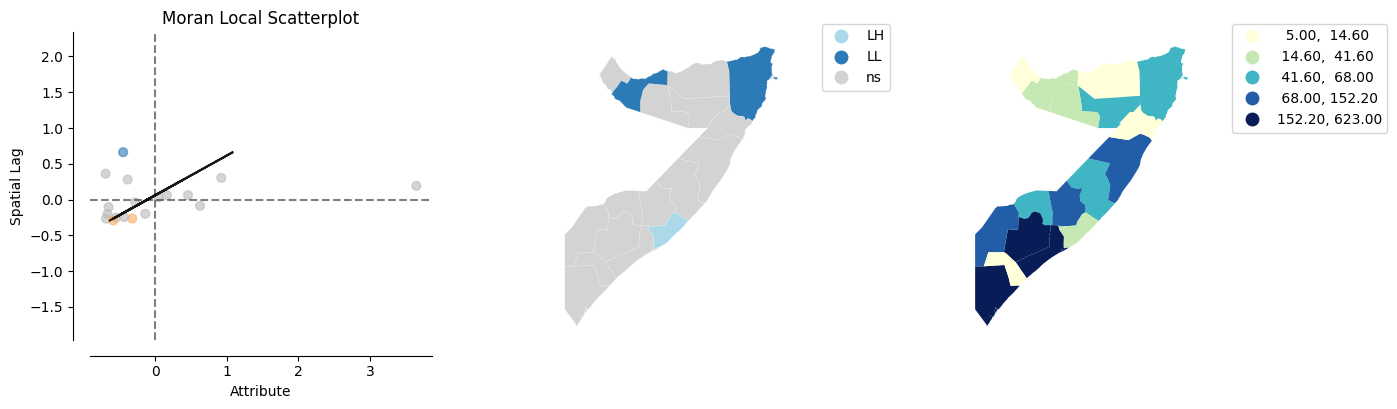

Year: 2013
p-value: 0.028
Moran I: 0.21331749071975856


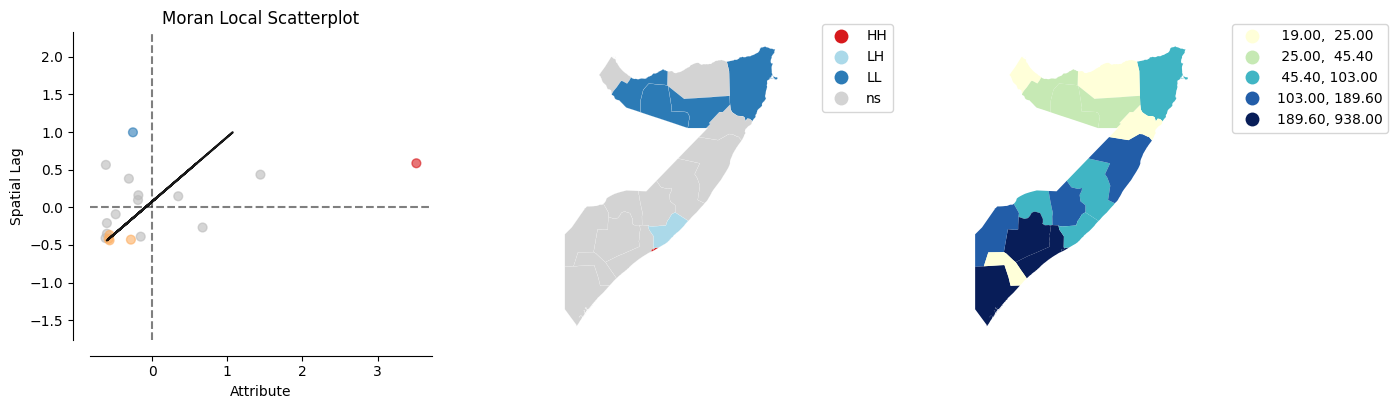

Year: 2014
p-value: 0.032
Moran I: 0.311875135960648


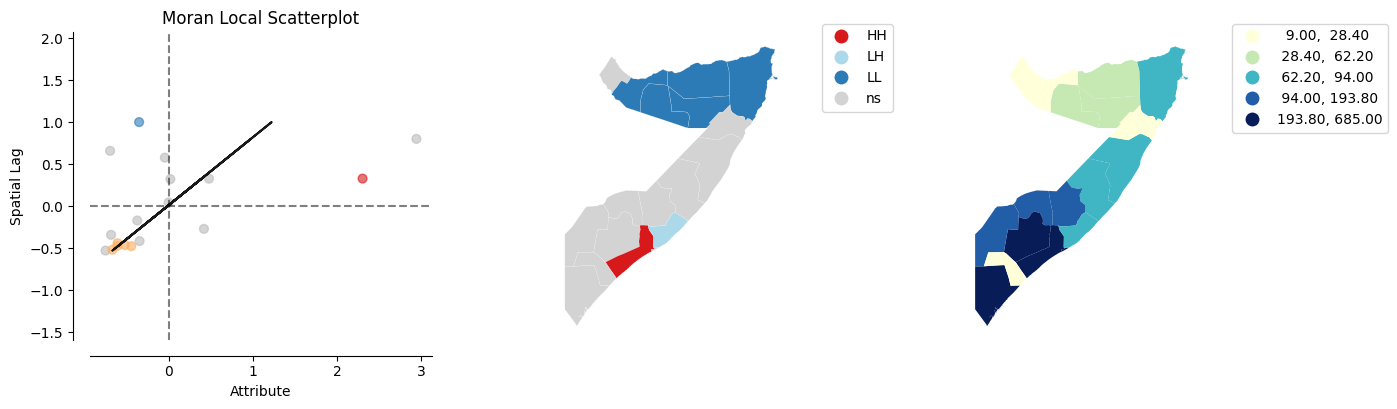

Year: 2015
p-value: 0.032
Moran I: 0.280091025871686


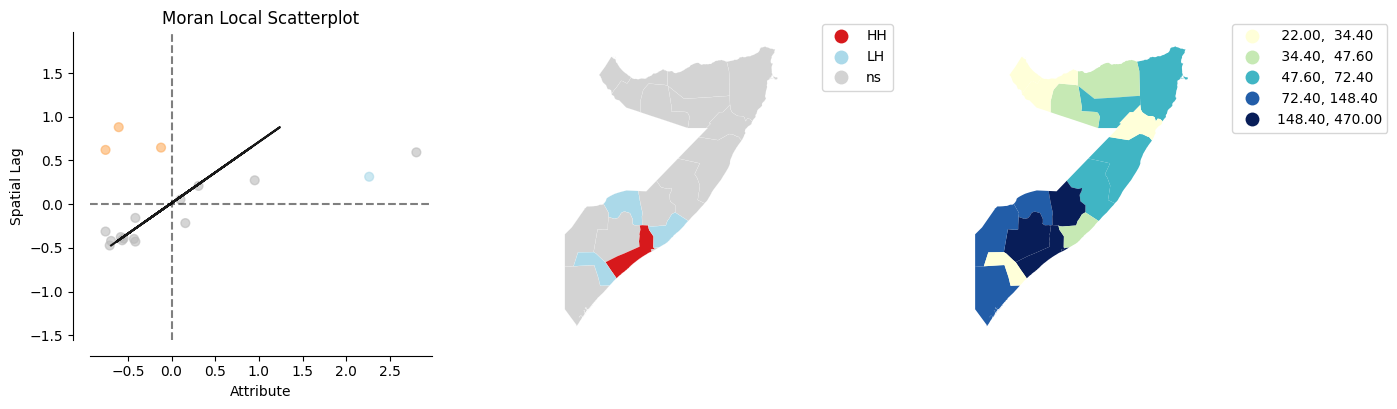

Year: 2016
p-value: 0.025
Moran I: 0.3132430250285378


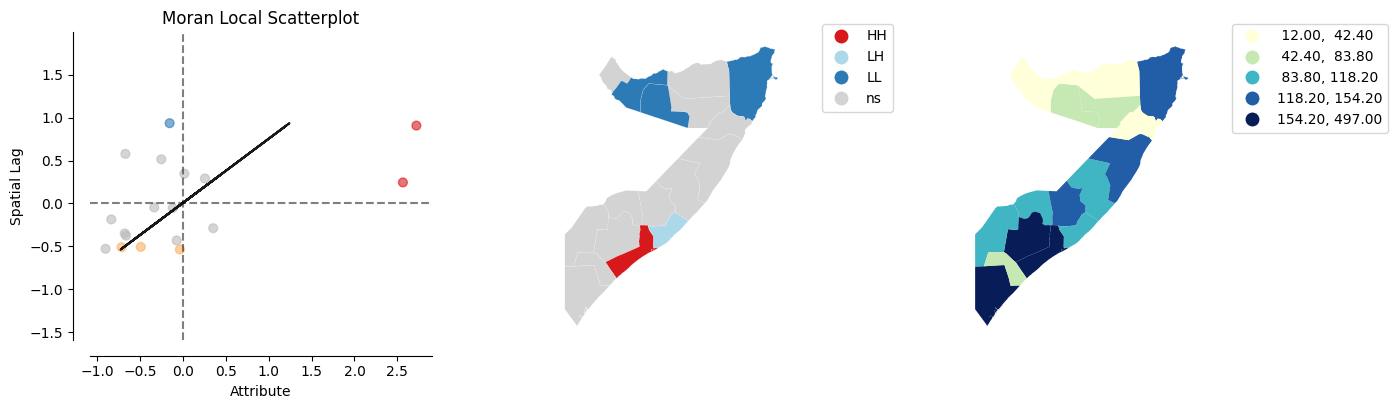

Year: 2017
p-value: 0.016
Moran I: 0.3451880106247719


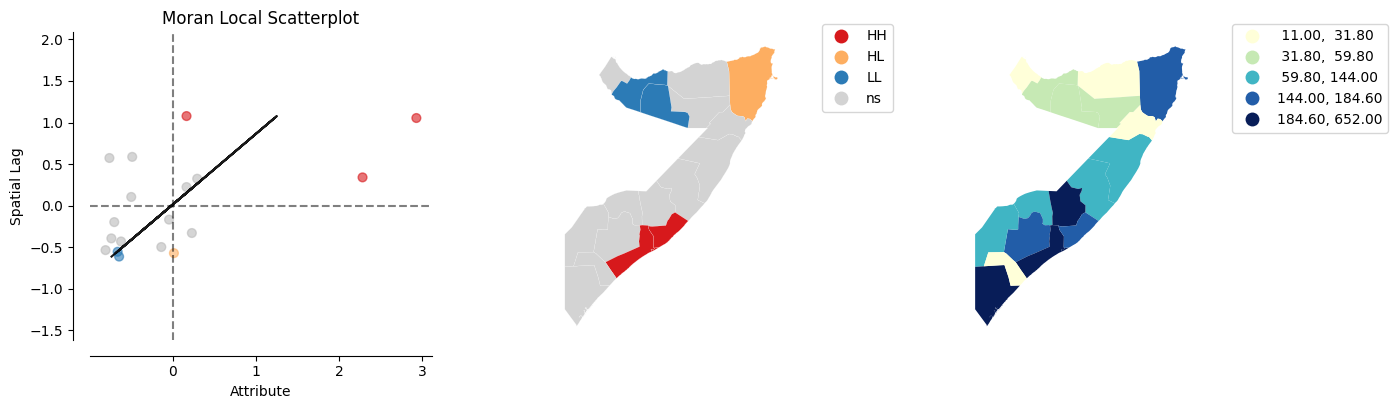

Year: 2018
p-value: 0.024
Moran I: 0.31460167674843953


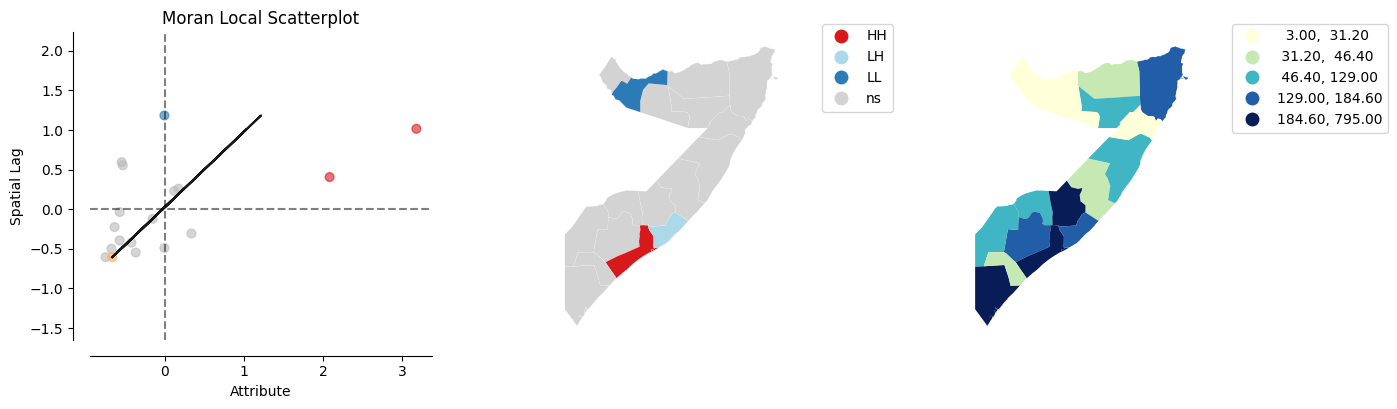

Year: 2019
p-value: 0.014
Moran I: 0.45851413972677046


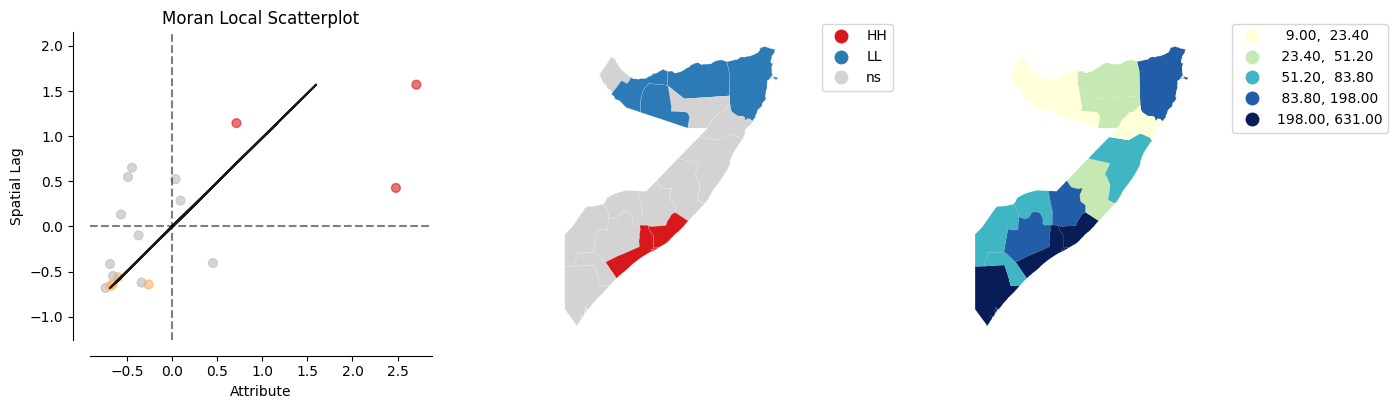

Year: 2020
p-value: 0.007
Moran I: 0.37755514765240417


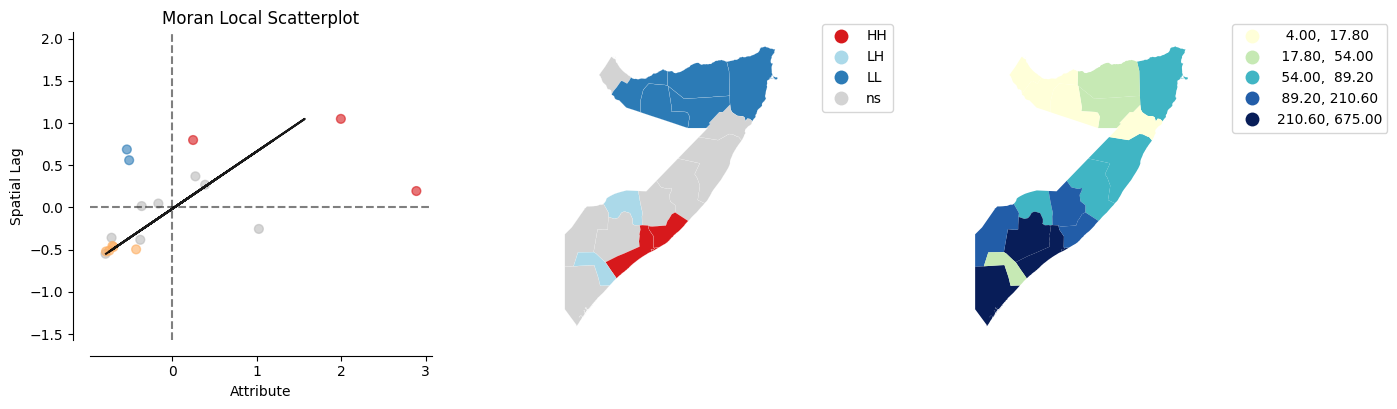

In [10]:
morans=[]
w = Queen.from_dataframe(states_gdf)

for date in conf_y.index.get_level_values(0).unique():
    c_year = conf_y.loc[date].reset_index()
    merged_data = states_gdf.merge(c_year, left_on='ADM1_EN', right_on='admin1')
    y = merged_data['conflicts'].values
    moran = Moran(y, w)
    morans.append(moran)
    print('Year:' , date.year)
    print('p-value:', moran.p_sim)
    print('Moran I:', moran.I)

    # calculate Moran_Local and plot
    moran_loc = Moran_Local(y, w)
    plot_local_autocorrelation(moran_loc, merged_data, 'conflicts')
    plt.show()